In [1]:
看看0

'0000000000000000000000000000000000000000000000 文档起始位 00000000000000000000000000000000000000000000000'

In [1]:
from sympy import *

https://docs.sympy.org/latest/index.html

# 预备工作(Preliminaries)

初始化打印环境:

In [2]:
init_printing() 

所有的符号对象自动输出为LaTex形式:

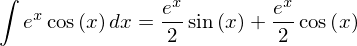

In [4]:
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit()) 

加快符号对象的输出速度: 直接打印符号对象, 将符号对象输出为字符串的形式;

In [5]:
%P  x; a;; Eq(a, a.doit())

@x>>: x,    @a>>: Integral(exp(x)*cos(x), x),    
@Eq(a, a.doit())>>: Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2),    


# 介绍(Introduction)

## 什么是符号计算

In [6]:
import math
%C round(math.sqrt(8),3); sympy.sqrt(8)

round(math.sqrt(8),3)  sympy.sqrt(8)
---------------------  -------------
2.828                  2*sqrt(2)    


In [7]:
sympy.sqrt(8) #默认输出符号对象形式,

## 更有趣的例子

In [8]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
%P expr; expr+1; expr-x; x*expr#不会自动执行化简

@expr>>: x + 2*y,    @expr+1>>: x + 2*y + 1,    @expr-x>>: 2*y,    @x*expr#不会自动执行化简>>: x*(x + 2*y),    


扩展表达式: expend()

In [9]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
%P expanded_expr; factor(expanded_expr)

@expanded_expr>>: x**2 + 2*x*y,    @factor(expanded_expr)>>: x*(x + 2*y),    


## 符号计算的力量

像SymPy这样的符号计算系统(symbolic computation system)的真正强大之处在于能够符号化的(symbolically,象征性地)进行各种计算。SymPy可以简化表达式(simplify)，计算导数(derivatives)，积分和极限(integrals,limits)，求解方程(solve equations)，使用矩阵等等。它还包括用于绘图，打印的模块（如数学公式的2D漂亮打印，或LATEX），代码生成，物理，统计，组合(combinatorics)，数论(number theory)，几何，逻辑等。

In [10]:
x, t, z, nu = symbols('x t z nu')

计算$\sin{(x)}e^x$的导数, 之前的`$\sin{(x)}e^x$`应该写为``\\(\sin{(x)}e^x\\)``?  
注意: 对于一些常见的函数, 要使用**\func**的形式创建LaTex表达式, 即在函数名前试探性的加上反斜线, $sin(x) e^x$.

In [11]:
diff(sin(x)*exp(x))

符号积分: 不定积分

In [12]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

定积分: \\(\int_{-\infty}^\infty \sin{(x^2)}\,dx\\).

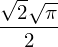

In [13]:
integrate(sin(x**2), (x,-oo,oo))

求极限: $\lim_{x\to 0}\frac{\sin{(x)}}{x}$.

In [14]:
limit(sin(x)/x,x,0)

解$x^2 - 2 = 0$.

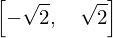

In [15]:
solve(x**2-2,x)

求微分方程: $y'' - y = e^t$.

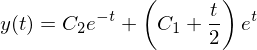

In [16]:
y = Function('y')
dsolve(Eq(y(t).diff(t,t)-y(t),exp(t)), y(t))

求特征值: $\left[\begin{smallmatrix}1 & 2\\ 2 & 2\end{smallmatrix}\right]$.  

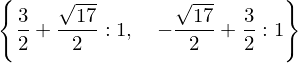

In [17]:
Matrix([[1,2],[2,2]]).eigenvals()

根据球贝塞尔函数$j_\nu(z)$重写贝塞尔函数$J_\nu(z)$;

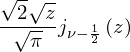

In [18]:
besselj(nu,z).rewrite(jn)

将数学字符串表达式, 转化为LaTex表达式

In [19]:
%P latex(Integral(cos(x)**2,(x,0,pi)))

@latex(Integral(cos(x)**2,(x,0,pi)))>>: \int_{0}^{\pi} \cos^{2}{\left (x \right )}\, dx,    


In [20]:
看看1

'1111111111111111111111111111111111111111111111 文档活动位 11111111111111111111111111111111111111111111111'

# 陷阱(Gotchas)

## 符号对象与变量名的区分

In [21]:
x,y,z = symbols('x y z')


理解SymPy符号和Python变量之间的区别, 对象和对象引用(变量名)的辩证关系:  
* 单词'Symbol'将引用SymPy符号, 单词'variable'将引用Python变量;  
* 地址与地址引用符号关系: 箱子和箱子里的猫的关系;

In [22]:
x = symbols('x') #变量x是一个`符号对象x`的引用变量
expr = x + 1
x 

In [23]:
x = 2 #变量x是一个int对象的引用变量
x

In [24]:
expr #x本是符号对象的引用, 但是半路被其他对象霸占了, 虽然引用丢失了, 但是原始对象还在

In [25]:
x = 'abc'
expr = x + 'def'
expr

'abcdef'

In [26]:
x = 'ABC'
expr

'abcdef'

将符号表达式中的符号变为一个常数值

In [27]:
x = symbols('x')
expr = x + 1
expr.subs(x, 2)

## 等号

In [28]:
x + 1 == 4 #左侧是符号(表达式)对象, 右侧是int对象,永远不可能相等

False

创建符号相等

In [29]:
Eq(x+1,4)

虽然左右两侧都是符号表达式, 而实际上也相等, 但是这两个表达式还是不等?   
两个符号表达式的结构不同;

In [30]:
(x+1)**2 == x**2 + 2*x +1

False

符号表达式的相等性判断不能使用is或者`==`, 而应该使用simplify(a,b)

In [31]:
a = (x + 1)**2
b = x**2 + 2*x + 1
simplify(a - b)

In [32]:
c = x**2 - 2*x + 1
simplify(a - c)
4*x

通过equals测试两个表达式是否相等

In [33]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

## 最后

符号对象加一个整型对象得到一个符号对象

In [34]:
%P Integer(1)+1; type(Integer(1)+1);; type(1+1)

@Integer(1)+1>>: 2,    @type(Integer(1)+1)>>: <class 'sympy.core.numbers.Integer'>,    
@type(1+1)>>: <class 'int'>,    


符号整数相除仍是一个符号对象

In [35]:
%P Integer(1)/Integer(3); type(Integer(1)/Integer(3))

@Integer(1)/Integer(3)>>: 1/3,    @type(Integer(1)/Integer(3))>>: <class 'sympy.core.numbers.Rational'>,    


明确的构造一个有理数符号对象

In [36]:
type(Rational(1,3))

sympy.core.numbers.Rational

In [37]:
%P x+1/2; type(x + 1/2);; x + Rational(1, 2); type(x + Rational(1, 2))

@x+1/2>>: x + 0.5,    @type(x + 1/2)>>: <class 'sympy.core.add.Add'>,    
@x + Rational(1, 2)>>: x + 1/2,    @type(x + Rational(1, 2))>>: <class 'sympy.core.add.Add'>,    


# 基本操作(Basic Operations)

In [7]:
from sympy import *

In [5]:
x,y,z = symbols("x y z")

## 换元: Substitution

In [9]:
expr = cos(x) + 1
%P expr

@expr>>: cos(x) + 1,    


In [11]:
%P expr.subs(x,y)

@expr.subs(x,y)>>: cos(y) + 1,    


通过换元, 在某个点上计算表达式的值:

In [13]:
%P expr.subs(x,0)

@expr.subs(x,0)>>: 2,    


通过换元, 将某个子表达式替换成另一个子表达式, $x^{x^{x^x}}$

In [26]:
expr = x**y
expr

In [27]:
expr = expr.subs(y, x**y)
expr

In [28]:
expr = expr.subs(y, x**x)
expr

replace \\(\sin(2x)\\) with \\(2\sin(x)\cos(x)\\)

In [31]:
expr = sin(2*x) + cos(2*x)
expr

In [29]:
expand_trig(expr)

In [30]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

关于subs()的注意事项:  
1. 符号对象是一成不变的(immutable),  因此subs不会原位更改(in-place)原始符号对象;  
SymPy expressions are immutable. No function will change them in-place.

In [33]:
expr = cos(x)
expr.subs(x, 0)

In [34]:
expr

In [35]:
x

一次性的执行多个替换

In [37]:
expr = x**3 +4*x*y -z
expr

In [38]:
expr.subs([(x,2),(y,4),(z,0)])

列表推导式构建subs所需的替换列表

In [40]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
expr

In [41]:
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

## 将字符串转化为sympy表达式(Converting Strings to SymPy Expressions)

### sympify()

sympify(): 符号化函数, 不是简化(simplify), 可以将字符串转化为sympy表达式

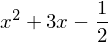

In [45]:
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
expr

In [46]:
expr.subs(x, 2)

### evalf()

evalf(): 计算浮点表达式的任意精度

In [51]:
pi.evalf(10)

evalf()中的subs参数是一个字典

In [54]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

取消结果中的舍入误差: roundoff errors

In [55]:
one = cos(1)**2 + sin(1)**2
(one - 1).evalf()

In [56]:
(one - 1).evalf(chop=True)

### lambdify

将SymPy表达式转换为可以进行数值计算的表达式

In [59]:
a = np.arange(10) 
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
expr = sin(x)
expr

In [63]:
f = lambdify(x, expr, "numpy") 
f(a) 

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [66]:
f = lambdify(x, expr, "math")
f(0.1)

lambdify(): sympy表达式中的函数, 使用自定义函数转化为数值

In [68]:
def mysin(x):
    """My sine. Note that this is only accurate for small x."""
    return x

In [70]:
f = lambdify(x, expr, {"sin":mysin})
f(0.1)

# 格式(Printing)

SymPy支持的打印格式: str, srepr, ASCII pretty printer, Unicode pretty printer, LaTeX, MathML, Dot

## 设置美化环境(Setting up Pretty Printing)

init_printing(): 为符号对象自动选择最佳的美化环境;  
init_session(): 自动导入sympy中的所有对象, 创建一些常用的符号, 配置绘图功能;

jupyter notebook的最佳美化环境是`MathJax`;  
IPython控制台会话(console session)中默认使用`Unicode pretty printer`(如果支持Unicode的话), 否则使用 `ASCII pretty printer`;

In [84]:
init_printing(use_latex=False) #unicode打印机
Integral(sqrt(1/x),x) 

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           

In [85]:
init_printing(use_latex=False, use_unicode=False) #ASCII打印机
Integral(sqrt(1/x),x)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            

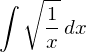

In [131]:
init_printing() #latex打印机 
Integral(sqrt(1/x),x)

## Printing Functions

### str

In [86]:
str(Integral(sqrt(1/x), x))

'Integral(sqrt(1/x), x)'

### srepr

In [87]:
srepr(Integral(sqrt(1/x), x))

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

### ASCII Pretty Printer

In [90]:
pretty(Integral(sqrt(1/x), x))

'  /          \n |           \n |     ___   \n |    / 1    \n |   /  -  dx\n | \\/   x    \n |           \n/            '

In [93]:
print(pretty(Integral(sqrt(1/x), x)))

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


### Unicode Pretty Printer

In [94]:
pprint(Integral(sqrt(1/x), x), use_unicode=True)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


### LaTex

In [98]:
%P latex(Integral(sqrt(1/x), x))

@latex(Integral(sqrt(1/x), x))>>: \int \sqrt{\frac{1}{x}}\, dx,    


将`\int \sqrt{\frac{1}{x}}\, dx`放在`$$`之间即可显示为公式:  $\int \sqrt{\frac{1}{x}}\, dx$

### MathML

将公式表示为网页格式

In [104]:
from sympy.printing.mathml import print_mathml, mathml

In [105]:
print_mathml( Integral(sqrt(1/x), x) )

<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



In [108]:
ml = mathml( Integral(sqrt(1/x), x) )
ml

<apply><int/><bvar><ci>x</ci></bvar><apply><root/><apply><power/><ci>x</ci><cn>-1</cn></apply></apply></apply>


### Dot

In [109]:
from sympy.printing.dot import dotprint
from sympy.abc import x

In [118]:
print(dotprint(Integral(sqrt(1/x), x)),file=open('mathdot.dot','w'))

In [125]:
showfile('mathdot.dot',headn=3)

@mathdot.dot>>                                    
  1: digraph{
  2: 
  3: # Graph style


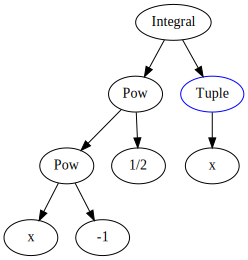

In [121]:
dot2graph('mathdot.dot')

# 化简(Simplification)

In [145]:
kk1

'1111111111111111111111111111111111111111111111 文档活动位 11111111111111111111111111111111111111111111111'

## simplify()

符号操作系统最有用的特征之一, 简化数学表达式的能力;  
simplify(): 启发式的, 可能不会进行因式分解;

In [2]:
from sympy import *

In [35]:
init_printing(use_latex=False,use_unicode=false)

In [36]:
x,y,z = symbols("x,y,z")

In [37]:
expr = sin(x)**2 + cos(x)**2
expr

   2         2   
sin (x) + cos (x)

In [38]:
simplify(expr)

1

In [39]:
expr = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
expr

 3    2        
x  + x  - x - 1
---------------
   2           
  x  + 2*x + 1 

In [40]:
simplify(expr)

x - 1

In [41]:
expr = gamma(x)/gamma(x - 2)
expr

  gamma(x)  
------------
gamma(x - 2)

In [34]:
simplify(expr)

(x - 2)⋅(x - 1)

## 多项式/有理函数简化(Polynomial/Rational)

### expand()

In [42]:
expand((x + 1)**2)

 2          
x  + 2*x + 1

In [43]:
expand((x + 2)*(x - 3))

 2        
x  - x - 6

In [46]:
expand((x + 1)*(x - 2) - (x - 1)*x)

-2

### 因式分解(factor)

以x为焦点因式分解

In [47]:
factor(x**3 - x**2 + x - 1)

        / 2    \
(x - 1)*\x  + 1/

In [48]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

           2
z*(x + 2*y) 

如果你对因式本身感兴趣, factor_list()可以返回更结构化的输出:

In [50]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z) #三个因式

(1, [(z, 1), (x + 2*y, 2)])

以func(x)为焦点因式分解;  
如果输入不是有理数的多项式, 因式有可能不可分解的(irreducible);

In [51]:
expand((cos(x) + sin(x))**2)

   2                           2   
sin (x) + 2*sin(x)*cos(x) + cos (x)

In [52]:
factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)

                 2
(sin(x) + cos(x)) 

### collect()

collect(): 合并同类项

In [54]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

 3    2        2              
x  - x *z + 2*x  + x*y + x - 3

In [57]:
collected_expr = collect(expr, x)
collected_expr 

 3    2                         
x  + x *(-z + 2) + x*(y + 1) - 3

查询同类项的系数

In [58]:
collected_expr.coeff(x, 2)

-z + 2

### cancel()

In [62]:
init_printing(use_latex=1)

Cancel common factors in a rational function ``f``: 取消有理函数``f``中的公因子;

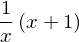

In [63]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

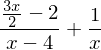

In [64]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr

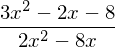

In [65]:
cancel(expr)

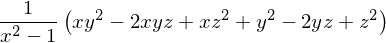

In [66]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

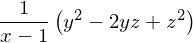

In [67]:
cancel(expr)

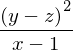

In [68]:
factor(expr)

### apart()

**部分分式分解**(partial fraction decomposition): 将单个有理函数变为多简单有理函数的和的形式, 在线性运算中可以简化运算过程, 例如简化有理函数求导(反导), 积分, 幂级数展开等;

不可约多项式（irreducible polynomial）

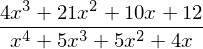

In [71]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

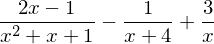

In [72]:
apart(expr)

## 三角简化(Trigonometric Simplification)   

反三角函数(inverse trigonometric functions)的名字以a开头;

In [77]:
acos(x)

In [78]:
cos(acos(x))

In [79]:
asin(1)

### trigsimp()

trigsimp(): 三角函数简化, 与simplify类似, 也是一种启发式算法(heuristic);

In [81]:
trigsimp(sin(x)**2 + cos(x)**2)

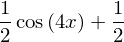

In [82]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [83]:
trigsimp(sin(x)*tan(x)/sec(x))

trigsimp()也用双曲线三角函数(hyperbolic trig functions):

In [84]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [85]:
trigsimp(sinh(x)/tanh(x))

### expand_trig()

expand_trig(): 适用于 sum or double angle identities

In [87]:
expand_trig(sin(x + y))

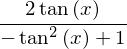

In [88]:
expand_trig(tan(2*x))

In [89]:
trigsimp(sin(x)*cos(y) + sin(y)*cos(x))

## Powers
   powsimp
   expand_power_exp / expand_power_base
   powdenest

Identity | Sufficient conditions to hold | Counterexample when conditions are
not met | Important consequences  
---|---|---|---  
  
  1. \\(x^ax^b = x^{a + b}\\)

| Always true | None | None  
  
  2. \\(x^ay^a = (xy)^a\\)

| \\(x, y \geq 0\\) and \\(a \in \mathbb{R}\\) | \\((-1)^{1/2}(-1)^{1/2} \neq
(-1\cdot-1)^{1/2}\\) | \\(\sqrt{x}\sqrt{y} \neq \sqrt{xy}\\) in general  
  
  3. \\((x^a)^b = x^{ab}\\)

| \\(b \in \mathbb{Z}\\) | \\({\left((-1)^2\right )}^{1/2} \neq
(-1)^{2\cdot1/2}\\) | \\(\sqrt{x^2}\neq x\\) and
\\(\sqrt{\frac{1}{x}}\neq\frac{1}{\sqrt{x}}\\) in general 

## Exponentials and logarithms
   expand_log
   logcombine

## Special Functions
   rewrite
   expand_func
   hyperexpand
   combsimp
   gammasimp

## Example: Continued Fractions

# Calculus

# Solvers

# Matrices

# Advanced Expression Manipulation

In [47]:
看看2

'2222222222222222222222222222222222222222222222 文档终止位 22222222222222222222222222222222222222222222222'